# Player Classification with CNN

In [1]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [3]:
classifier = Sequential()

In [4]:
# Convolution
classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())

In [5]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))


In [6]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, 5, 5, activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

In [7]:
# Flattening
classifier.add(Flatten())

In [8]:
# Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(1, activation = 'sigmoid'))

In [10]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN/dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 209 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN/dataset/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 72 images belonging to 2 classes.


In [15]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from livelossplot import PlotLossesKerasTF

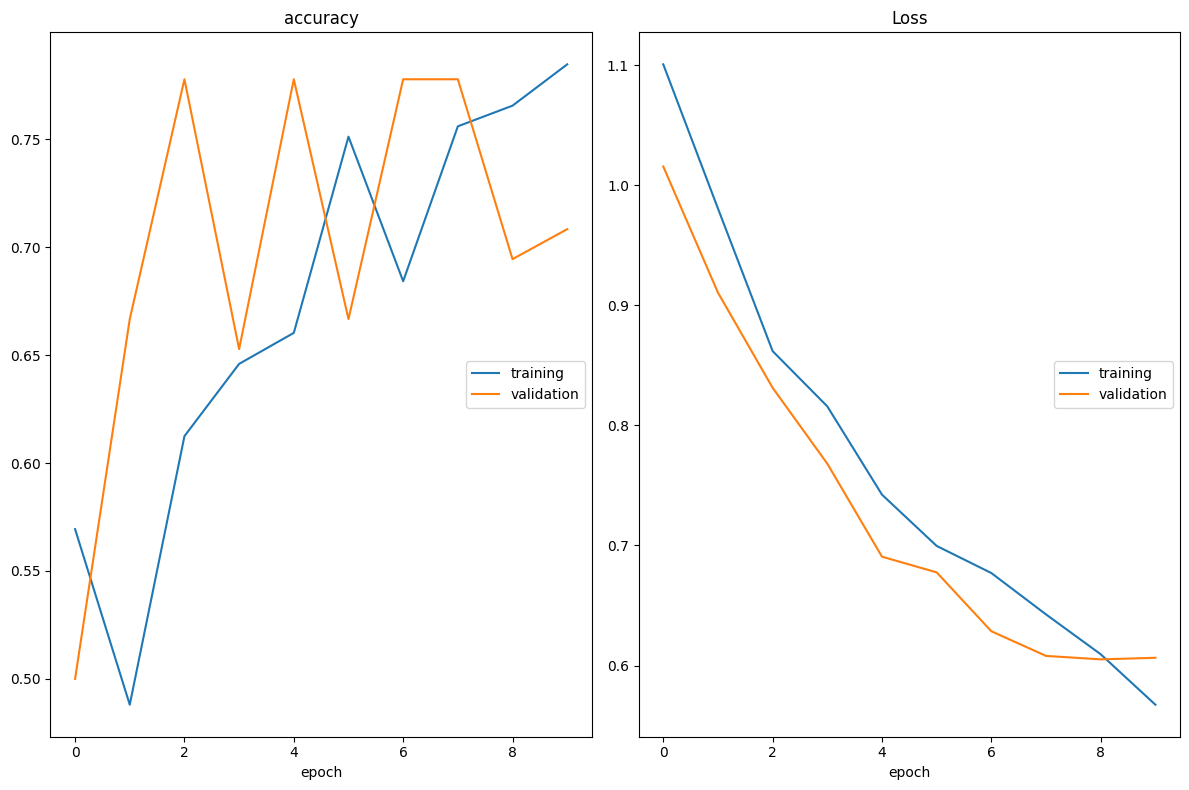

accuracy
	training         	 (min:    0.488, max:    0.785, cur:    0.785)
	validation       	 (min:    0.500, max:    0.778, cur:    0.708)
Loss
	training         	 (min:    0.567, max:    1.101, cur:    0.567)
	validation       	 (min:    0.605, max:    1.016, cur:    0.606)
14/14 [==============================] - 4s 306ms/step - loss: 0.5673 - accuracy: 0.7847 - val_loss: 0.6064 - val_accuracy: 0.7083


In [17]:
classifier.fit(training_set,epochs=10,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


In [18]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/CNN/dataset/train/dhoni/d1.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])
    
print(prediction)

1/1 [==============================] - 0s 97ms/step
Result is 0.0
dhoni


In [19]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/CNN/dataset/train/kohli/v1.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])
    
print(prediction)

1/1 [==============================] - 0s 21ms/step
Result is 1.0
kohli
